In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [2]:
all_files = glob.glob('**/*.csv', recursive=True)

For load files, I found a small error in file 'cycling\dataset14.csv', 'cycling\dataset9.csv',
by correct it manually, I can load data smoothly.

1.(a)Loading files

In [3]:
all_dfs = []
for file in all_files:
    all_dfs.append(pd.read_csv(file,skiprows=4))

print(len(all_dfs))

88


1.(b) Divide files into test data and train data.

In [4]:
test_series = [0,1,7,8,13,20,21,28,35,36,43,50,51,58,65,66,73,80,81]
for i in test_series:
    print(all_files[i])

bending1\dataset1.csv
bending1\dataset2.csv
bending2\dataset1.csv
bending2\dataset2.csv
cycling\dataset1.csv
cycling\dataset2.csv
cycling\dataset3.csv
lying\dataset1.csv
lying\dataset2.csv
lying\dataset3.csv
sitting\dataset1.csv
sitting\dataset2.csv
sitting\dataset3.csv
standing\dataset1.csv
standing\dataset2.csv
standing\dataset3.csv
walking\dataset1.csv
walking\dataset2.csv
walking\dataset3.csv


In [5]:
test_dfs = []
train_dfs = []

for i in range(0,88):
    if i in test_series:
        test_dfs.append(all_dfs[i])
    else:
        train_dfs.append(all_dfs[i])
        
print(len(test_dfs))
print(len(train_dfs))

19
69


In [6]:
all_dfs[0].describe()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,59875.000000,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583
std,34677.081769,1.476967,0.322605,4.462952,0.965659,2.188449,0.582915
min,0.000000,37.250000,0.000000,4.000000,0.000000,27.250000,0.000000
25%,29937.500000,39.250000,0.000000,16.000000,0.000000,33.000000,0.000000
50%,59875.000000,40.500000,0.430000,19.250000,0.500000,35.000000,0.430000
75%,89812.500000,42.000000,0.500000,23.250000,1.120000,36.000000,1.300000
max,119750.000000,45.000000,1.300000,29.500000,7.230000,38.250000,1.920000


1.(c)Feature Extraction

i. Research

By research on Internet, in paper[1], researchers used 
1.Mean Absolute Value (MAV) 2.Root Mean Square (RMS)  3.Mean  4.Variance (VAR) 
5.Standard Deviation (STD) 6.Simple Sign Integral (SSI) 
etc.

[1]Analysis of Statistical Time-Domain Features Effectiveness in Identification of Bearing Faults From Vibration Signal
IEEE SENSORS JOURNAL, VOL. 17, NO. 17, SEPTEMBER 1, 2017
B. R. Nayana and P. Geethanjali, Member, IEEE


ii. Extract the time-domain features

In [7]:
features = pd.DataFrame(columns=['min1','max1','mean1','median1','std1','1stquart1','3rdquart1',
                                 'min2','max2','mean2','median2','std2','1stquart2','3rdquart2',
                                 'min3','max3','mean3','median3','std3','1stquart3','3rdquart3',
                                 'min4','max4','mean4','median4','std4','1stquart4','3rdquart4',
                                 'min5','max5','mean5','median5','std5','1stquart5','3rdquart5',
                                 'min6','max6','mean6','median6','std6','1stquart6','3rdquart6'])
for i in range(0,len(all_dfs)):
    df = all_dfs[i]
    dict = {}
    for j in range(1,7):
        dict['min'+str(j)] = df[df.columns[j]].min(axis = 0)
        dict['max'+str(j)] = df[df.columns[j]].max(axis = 0)
        dict['mean'+str(j)] = df[df.columns[j]].mean(axis = 0)
        dict['median'+str(j)] = df[df.columns[j]].median(axis = 0)
        dict['std'+str(j)] = df[df.columns[j]].std(axis = 0)
        dict['1stquart'+str(j)] = df[df.columns[j]].quantile(0.25)
        dict['3rdquart'+str(j)] = df[df.columns[j]].quantile(0.75)
        
    features = features.append(pd.DataFrame(dict,index=[i + 1]))

In [8]:
features.shape

(88, 42)

iii. 

Use your judgement to select the three most important time-domain features.


In [9]:
features.iloc[:,0:6].describe()

,1stquart1,1stquart2,1stquart3,1stquart4,1stquart5,1stquart6
count,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,37.01983,0.745398,12.110682,0.719034,13.826761,0.902017
std,6.15359,0.946386,4.220658,0.843620,6.096465,0.758584
min,23.18750,0.000000,2.500000,0.000000,1.000000,0.000000
25%,31.62750,0.000000,10.250000,0.000000,11.295000,0.430000
50%,39.20000,0.430000,13.250000,0.430000,14.000000,0.470000
75%,42.00000,1.300000,14.250000,1.705625,15.500000,1.670000
max,48.00000,2.870000,20.500000,2.170000,35.362500,2.240000


In [10]:
features.iloc[:,6:12].describe()

,3rdquart1,3rdquart2,3rdquart3,3rdquart4,3rdquart5,3rdquart6
count,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000
mean,41.197216,1.976080,16.733722,1.998920,18.52821,2.142614
std,5.138925,2.125266,4.171628,1.552504,5.53172,1.523599
min,26.500000,0.000000,6.000000,0.470000,5.54250,0.500000
25%,38.250000,0.500000,15.000000,0.830000,16.64250,1.000000
50%,40.250000,0.500000,17.585000,1.120000,18.28125,1.220000
75%,45.000000,3.766250,19.000000,4.007500,20.75000,4.043125
max,54.000000,6.105000,24.372500,4.440000,36.50000,4.617500


In [11]:
features.iloc[:,12:18].describe()

,max1,max2,max3,max4,max5,max6
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,45.473068,6.290114,22.810909,6.761250,24.320114,6.461932
std,4.394362,5.062729,4.875137,2.183625,5.741238,2.518921
min,30.000000,0.430000,11.330000,2.490000,12.000000,1.790000
25%,44.585000,1.767500,21.000000,5.165000,21.000000,4.500000
50%,45.750000,4.500000,23.500000,6.070000,23.500000,6.310000
75%,47.750000,10.930000,25.580000,9.000000,25.500000,8.765000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


In [12]:
features.iloc[:,18:24].describe()

,mean1,mean2,mean3,mean4,mean5,mean6
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,38.917357,1.459119,14.278229,1.502218,16.035170,1.620686
std,5.335718,1.574164,4.008380,1.166114,5.675593,1.154812
min,24.562958,0.007167,4.382208,0.332063,4.303979,0.383292
25%,34.845755,0.366630,12.760526,0.614672,13.390958,0.730656
50%,39.433792,0.489365,15.299646,0.837208,15.993198,0.930188
75%,43.013250,2.731505,16.531083,2.988917,17.376687,3.005229
max,48.004167,4.576562,22.183625,3.365375,35.588458,3.530500


In [13]:
features.iloc[:,24:30].describe()

,median1,median2,median3,median4,median5,median6
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,38.856705,1.288068,14.613352,1.313352,16.239602,1.445511
std,5.440054,1.412244,4.036396,1.145586,5.813782,1.086474
min,24.250000,0.000000,4.500000,0.000000,2.250000,0.430000
25%,35.447500,0.430000,12.740000,0.470000,13.447500,0.500000
50%,39.415000,0.500000,15.330000,0.500000,16.125000,0.830000
75%,43.250000,2.185000,16.690000,2.860000,17.812500,2.615000
max,48.000000,4.260000,23.000000,3.200000,36.000000,3.340000


In [14]:
features.iloc[:,30:36].describe()

,min1,min2,min3,min4,min5,min6
count,88.000000,88.0,88.000000,88.0,88.000000,88.000000
mean,29.036705,0.0,3.101477,0.0,4.676364,0.004886
std,9.569975,0.0,2.956462,0.0,6.124001,0.045838
min,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,21.875000,0.0,0.000000,0.0,0.000000,0.000000
50%,28.625000,0.0,2.250000,0.0,2.500000,0.000000
75%,36.270000,0.0,6.000000,0.0,6.812500,0.000000
max,48.000000,0.0,8.500000,0.0,29.000000,0.430000


In [15]:
features.iloc[:,36:42].describe()

,std1,std2,std3,std4,std5,std6
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2.988893,0.987459,3.577925,1.067130,3.537752,1.048533
std,1.772153,0.884105,0.946710,0.458242,1.024898,0.517617
min,0.032038,0.055106,1.745801,0.409145,1.745970,0.388372
25%,1.468289,0.320845,2.946473,0.716983,2.942275,0.613688
50%,3.212700,0.455526,3.457400,0.903342,3.265060,0.838716
75%,4.552490,1.900389,3.987098,1.600137,4.074511,1.642064
max,7.684146,2.625516,7.638935,1.861730,7.853427,1.963685


By these 7 tables of different features,
I choose to use max, mean and std.

(d) Binary Classification Using Logistic Regression

i. Depict scatter plots of bending and other data.

In [16]:
bending_dfs = train_dfs[0:9]
other_dfs = train_dfs[9:]

In [17]:
bending_dfs[0].head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,42.00,0.71,21.25,0.43,30.00,0.00
1,250,41.50,0.50,20.25,1.48,31.25,1.09
2,500,41.50,0.50,14.25,1.92,33.00,0.00
3,750,40.75,0.83,15.75,0.43,33.00,0.00
4,1000,40.00,0.71,20.00,2.74,32.75,0.43


In [18]:
df_bending = bending_dfs[0]
df_other = other_dfs[0]
for i in range(1,len(bending_dfs)):
    df_bending = pd.concat([df_bending,bending_dfs[i]])
    
for j in range(1,len(other_dfs)):
    df_other = pd.concat([df_other,other_dfs[j]])

In [19]:
df_bending.shape

(4320, 7)

In [20]:
def feature_select(dfs):
    features_selected = pd.DataFrame(columns=['max1','mean1','std1','max2','mean2','std2',
        'max6','mean6','std6'])
    for i in range(0,len(dfs)):
        df = dfs[i]
        dict = {}
        for j in [1,2,6]:
            dict['max'+str(j)] = df[df.columns[j]].max(axis = 0)
            dict['mean'+str(j)] = df[df.columns[j]].mean(axis = 0)
            dict['std'+str(j)] = df[df.columns[j]].std(axis = 0)
        features_selected = features_selected.append(pd.DataFrame(dict,index=[i + 1]))
    return features_selected

In [21]:
bending_training_features = feature_select(bending_dfs)
other_training_features = feature_select(other_dfs)

In [22]:
bending_training_features

,max1,max2,max6,mean1,mean2,mean6,std1,std2,std6
1,47.40,1.70,1.79,43.954500,0.426250,0.493292,1.558835,0.338690,0.513506
2,47.75,3.00,2.18,42.179813,0.696042,0.613521,3.670666,0.630860,0.524317
3,45.75,2.83,1.79,41.678063,0.535979,0.383292,2.243490,0.405469,0.389164
4,48.00,1.58,5.26,43.454958,0.378083,0.679646,1.386098,0.315566,0.622534
5,48.00,1.50,2.96,43.969125,0.413125,0.555313,1.618364,0.263111,0.487826
6,50.00,9.90,13.61,32.586208,0.516125,1.162042,6.238143,0.789957,1.332980
7,33.00,1.00,6.40,29.881938,0.256438,0.701625,1.153837,0.275833,0.481103
8,45.50,6.40,6.73,30.938104,0.467167,1.107354,7.684146,0.734444,1.080842
9,47.50,6.38,4.92,31.058250,0.405458,1.098104,4.829794,0.566668,0.831480


In [23]:
print(bending_training_features.shape)
print(other_training_features.shape)

(9, 9)
(60, 9)


In [24]:
bend_action = []
other_action = []
for i in range(0,bending_training_features.shape[0]+1):
    bend_action.append(1)
for i in range(0,other_training_features.shape[0]+1):
    other_action.append(0)

#set bending action as 1, other action as 0
    
    
bending_training_features['action'] = pd.Series(bend_action)
other_training_features['action'] = pd.Series(other_action)

df_training_bending_and_other = pd.concat([bending_training_features,other_training_features])

In [25]:
df_training_bending_and_other

,max1,max2,max6,mean1,mean2,mean6,std1,std2,std6,action
1,47.40,1.70,1.79,43.954500,0.426250,0.493292,1.558835,0.338690,0.513506,1
2,47.75,3.00,2.18,42.179813,0.696042,0.613521,3.670666,0.630860,0.524317,1
3,45.75,2.83,1.79,41.678063,0.535979,0.383292,2.243490,0.405469,0.389164,1
4,48.00,1.58,5.26,43.454958,0.378083,0.679646,1.386098,0.315566,0.622534,1
5,48.00,1.50,2.96,43.969125,0.413125,0.555313,1.618364,0.263111,0.487826,1
6,50.00,9.90,13.61,32.586208,0.516125,1.162042,6.238143,0.789957,1.332980,1
7,33.00,1.00,6.40,29.881938,0.256438,0.701625,1.153837,0.275833,0.481103,1
8,45.50,6.40,6.73,30.938104,0.467167,1.107354,7.684146,0.734444,1.080842,1
9,47.50,6.38,4.92,31.058250,0.405458,1.098104,4.829794,0.566668,0.831480,1
1,45.00,10.47,8.99,36.819521,2.600146,2.887562,3.900459,1.821404,1.723094,0


In [28]:
sns.set(style="ticks")
sns.pairplot(df_training_bending_and_other, hue="action")
plt.show()

(d)ii. 

Break each time series in your training set into two (approximately) equal
length time series.

In [29]:
def split_df(dfs,l):
    dfs_split = []
    for df in dfs:
        pace = int(df.shape[0]/l) + 1
        for index in range(0,df.shape[0],pace):
            df_split = df.iloc[index:index + pace,:]
            dfs_split.append(df_split)
    return dfs_split
    
    

In [30]:
bending_dfs_split_2 = split_df(bending_dfs,2)
other_dfs_split_2 = split_df(other_dfs,2)

In [31]:
print(len(bending_dfs_split_2))
print(len(other_dfs_split_2))

18
120


In [32]:
bending_training_features_split_2 = feature_select(bending_dfs_split_2)
other_training_features_split_2 = feature_select(other_dfs_split_2)

In [33]:
bend_action = []
other_action = []
for i in range(0,bending_training_features_split_2.shape[0]+1):
    bend_action.append(1)
for i in range(0,other_training_features_split_2.shape[0]+1):
    other_action.append(0)


bending_training_features_split_2['action'] = pd.Series(bend_action)
other_training_features_split_2['action'] = pd.Series(other_action)

df_training_bending_and_other = pd.concat([bending_training_features_split_2,other_training_features_split_2])

In [35]:
sns.set(style="ticks")
sns.pairplot(df_training_bending_and_other, hue="action")
plt.show()

(d)iii. 

Break each time series and choose the best l and best 10 features.

When using cross-validation in this problem, there are a wrong way and a right way.

Wrong way:Just choose best 10 features, and use CV only for l.

Right way:Use CV both in choosing features and choosing l.

In [36]:
test_df = bending_dfs[0]
te = test_df.iloc[:,[True]]
#te.loc[:,('e')] = 1
te = te.assign(action=test_df.iloc[:,[False,True]].values)

In [37]:
te['action']

0      42.00
1      41.50
2      41.50
3      40.75
4      40.00
5      41.25
6      42.25
7      43.50
8      42.75
9      43.25
10     43.25
11     43.75
12     44.33
13     44.50
14     44.75
15     45.00
16     45.00
17     45.00
18     45.00
19     45.00
20     45.00
21     45.00
22     45.00
23     45.00
24     45.00
25     45.00
26     45.00
27     45.00
28     45.00
29     45.00
       ...  
450    43.33
451    43.50
452    43.50
453    43.50
454    43.50
455    43.25
456    43.25
457    43.50
458    43.25
459    43.00
460    42.67
461    43.00
462    43.00
463    43.50
464    43.25
465    43.00
466    43.00
467    43.00
468    43.00
469    43.00
470    43.50
471    43.50
472    43.00
473    43.25
474    42.75
475    42.50
476    42.67
477    44.33
478    45.25
479    47.25
Name: action, dtype: float64

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [41]:
def feature_selection(df):
    model = LogisticRegression()
    # create the RFE model and select 10 attributes
    rfe = RFE(model,10)
    rfe = rfe.fit(df.iloc[:,0:-1], df['action'])
    return (rfe.support_)

    

In [42]:
def all_features_data(dfs,l,action_class):
    dfs_split = split_df(dfs,l)
    all_features_data = pd.DataFrame(columns=['min1','max1','mean1','median1','std1','1stquart1','3rdquart1',
                                 'min2','max2','mean2','median2','std2','1stquart2','3rdquart2',
                                 'min3','max3','mean3','median3','std3','1stquart3','3rdquart3',
                                 'min4','max4','mean4','median4','std4','1stquart4','3rdquart4',
                                 'min5','max5','mean5','median5','std5','1stquart5','3rdquart5',
                                 'min6','max6','mean6','median6','std6','1stquart6','3rdquart6','action'])
    
    for i in range(0,len(dfs_split)):
        df = dfs_split[i]
        dict = {}
        for j in range(1,7):
            dict['min'+str(j)] = df[df.columns[j]].min(axis = 0)
            dict['max'+str(j)] = df[df.columns[j]].max(axis = 0)
            dict['mean'+str(j)] = df[df.columns[j]].mean(axis = 0)
            dict['median'+str(j)] = df[df.columns[j]].median(axis = 0)
            dict['std'+str(j)] = df[df.columns[j]].std(axis = 0)
            dict['1stquart'+str(j)] = df[df.columns[j]].quantile(0.25)
            dict['3rdquart'+str(j)] = df[df.columns[j]].quantile(0.75)
            dict['action'] = action_class
        all_features_data = all_features_data.append(pd.DataFrame(dict,index=[i + 1]))
    return all_features_data
    
    

In [43]:
def get_score(training_data, test_data):
    logistic = LogisticRegression()
    logistic.fit(training_data.iloc[:,0:-1], training_data['action'])
    return logistic.score(test_data.iloc[:,0:-1], test_data['action'])
    

In [44]:
def CV_for_feature_selection(df_with_all_features):
    size = df_with_all_features.shape[0]
    single_size = int(size/5)
    pieces = [df_with_all_features.iloc[0:single_size,:],df_with_all_features.iloc[single_size:2*single_size,:],
             df_with_all_features.iloc[2*single_size:3*single_size,:],df_with_all_features.iloc[3*single_size:4*single_size,:],
             df_with_all_features.iloc[4*single_size:5*single_size,:]]
    
    train_combinations = [[1,2,3,4],[0,2,3,4],[0,1,3,4],[0,1,2,4],[0,1,2,3]]
    test_combinations = [0,1,2,3]
    f_selected_list = []
    accuracy = []
    
    for i in range(0,len(test_combinations)):
        ind = train_combinations[i]
        
        train_data = pd.concat([pieces[ind[0]],pieces[ind[1]],pieces[ind[2]],pieces[ind[3]]])
        test_data = pieces[i]
        
        
        f_selected = feature_selection(train_data)
        f_selected_list.append(f_selected)
        
        train_selected_data = train_data.iloc[:,f_selected]

        train_selected_data = train_selected_data.assign(action= train_data['action'])

        test_selected_data = test_data.iloc[:,f_selected]
        test_selected_data = test_selected_data.assign(action= test_data['action'])
  
        
        accuracy.append(get_score(train_data, test_data))
        
    po = accuracy.index(max(accuracy))
    return f_selected_list[po]
    

In [45]:
scores = {}
selected_features = []
for l in range(1,21):
    print("Computing l = " + str(l))
    bendings_all_feature = all_features_data(bending_dfs,l,1)
  
    other_all_feature = all_features_data(other_dfs,l,0) 
    # 1 as bending class, 0 as other class
    df_with_all_features = pd.concat([bendings_all_feature,other_all_feature])
    df_with_all_features = df_with_all_features.sample(frac=1).reset_index(drop=True)
    df_with_all_features = df_with_all_features.reindex_axis(['1stquart1', '1stquart2', '1stquart3', '1stquart4', '1stquart5',
       '1stquart6', '3rdquart1', '3rdquart2', '3rdquart3', '3rdquart4',
       '3rdquart5', '3rdquart6', 'max1', 'max2', 'max3', 'max4',
       'max5', 'max6', 'mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6',
       'median1', 'median2', 'median3', 'median4', 'median5', 'median6',
       'min1', 'min2', 'min3', 'min4', 'min5', 'min6', 'std1', 'std2', 'std3',
       'std4', 'std5', 'std6', 'action'], axis=1)
    
    #df_with_all_features = df_with_all_features.assign(
    #    'action' = pd.to_numeric(df_with_all_features['action'], downcast='integer'))
    #df_with_all_features.insert(len(df_with_all_features.columns),'action',test_data['action'])
    f_selected = CV_for_feature_selection(df_with_all_features)
    selected_features.append(f_selected)

    
    
    
    df_selected_features = df_with_all_features.iloc[:,f_selected]
    df_selected_features = df_selected_features.assign(action = df_with_all_features['action'])
    #print(df_selected_features['action'])
    
    logistic = LogisticRegression()
#    scores[l] = sum(cross_val_score(logistic, df_selected_features.iloc[:,0:-1],
#                               df_selected_features['action'],cv = 5))/(5.0)
    scores[l] = sum(cross_val_score(logistic, df_with_all_features.iloc[:,0:-1],
                               df_with_all_features['action'],cv = 5))/(5.0)
    print("Score is " + str(scores[l]))
    

Computing l = 1


Score is 0.97032967033
Computing l = 2


Score is 0.949206349206
Computing l = 3


Score is 0.951684088269
Computing l = 4


Score is 0.952792207792
Computing l = 5


Score is 0.959420289855
Computing l = 6


Score is 0.944431384073
Computing l = 7


Score is 0.935867697595
Computing l = 8


Score is 0.951154791155
Computing l = 9


Score is 0.945264516129
Computing l = 10


Score is 0.946376811594
Computing l = 11


Score is 0.940676193796
Computing l = 12


Score is 0.944461482293
Computing l = 13


Score is 0.94096213532
Computing l = 14


Score is 0.937887933337
Computing l = 15


Score is 0.941062801932
Computing l = 16


Score is 0.936602221308
Computing l = 17


Score is 0.94629932715
Computing l = 18


Score is 0.939613291877
Computing l = 19


Score is 0.941267814124
Computing l = 20


Score is 0.941304347826


choose L = 1

In [157]:
features_for_l_1 = df_with_all_features.columns[selected_features[6]]

F:\anaconda3\lib\site-packages\pandas\indexes\base.py:1434: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 43 but corresponding boolean dimension is 42
  result = getitem(key)


In [158]:
bendings_all_feature = all_features_data(bending_dfs,7,1)
  
other_all_feature = all_features_data(other_dfs,7,0) 
# 1 as bending class, 0 as other class
df_with_all_features = pd.concat([bendings_all_feature,other_all_feature])
df_with_all_features = df_with_all_features.sample(frac=1).reset_index(drop=True)
df_with_all_features = df_with_all_features.reindex_axis(['1stquart1', '1stquart2', '1stquart3', '1stquart4', '1stquart5',
       '1stquart6', '3rdquart1', '3rdquart2', '3rdquart3', '3rdquart4',
       '3rdquart5', '3rdquart6', 'max1', 'max2', 'max3', 'max4',
       'max5', 'max6', 'mean1', 'mean2', 'mean3', 'mean4', 'mean5', 'mean6',
       'median1', 'median2', 'median3', 'median4', 'median5', 'median6',
       'min1', 'min2', 'min3', 'min4', 'min5', 'min6', 'std1', 'std2', 'std3',
       'std4', 'std5', 'std6', 'action'], axis=1)
    

print(features_for_l_1)
df_selected_features = df_with_all_features[features_for_l_1]
df_selected_features = df_selected_features.assign(action = df_with_all_features['action'])
#print(df_selected_features['action'])

logistic = LogisticRegression()
logistic.fit(df_selected_features.iloc[:,0:-1],df_selected_features['action'])
scores = sum(cross_val_score(logistic, df_selected_features.iloc[:,0:-1],
                            df_selected_features['action'],cv = 5))/(5.0)
print("Score is " + str(scores))

Index(['1stquart1', '1stquart6', '3rdquart1', '3rdquart6', 'max1', 'max2',
       'max5', 'median1', 'median2', 'std5'],
      dtype='object')
Score is 0.935760309278


In [159]:
df_selected_features.columns

Index(['1stquart1', '1stquart6', '3rdquart1', '3rdquart6', 'max1', 'max2',
       'max5', 'median1', 'median2', 'std5', 'action'],
      dtype='object')

In [160]:
logistic.predict(df_selected_features.iloc[:,0:-1])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [161]:
predict_result = logistic.predict(df_selected_features.iloc[:,0:-1])
(predict_result - df_selected_features['action']).abs().sum() 

27.0

In [162]:
predict_result.sum()

58.0

In [163]:
len(predict_result)

483

In [164]:
print("Confusion Matrix")
pd.DataFrame(data={'Class 0(other) Predicted':[69,0],'Class 1(bending) Predicted':[0,9]},
             index=['Class 0(other) Actual','Class 1(bending) Actual'])


Confusion Matrix


,Class 0(other) Predicted,Class 1(bending) Predicted
Class 0(other) Actual,69,0
Class 1(bending) Actual,0,9


In [165]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [166]:
y_score = logistic.decision_function(df_selected_features.iloc[:,0:-1])
fpr, tpr, thresholds  = roc_curve(df_selected_features['action'], y_score)
roc_auc = auc(fpr, tpr)



In [167]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

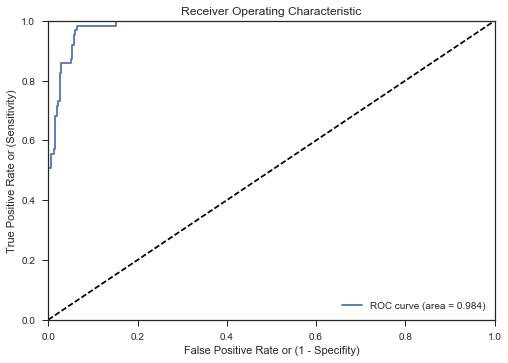

In [168]:
plt.show()

In [169]:
roc_auc

0.98405139833711264

In [170]:
logistic.coef_

array([[-0.37739828, -0.13387005, -0.34887107, -0.554958  ,  0.15064908,
        -0.32409728,  0.56173422,  0.28332542, -0.82824178, -0.46307311]])

In [171]:
import statsmodels.api as sm

In [172]:
logit = sm.Logit(df_selected_features['action'],df_selected_features.iloc[:,:-1])

In [173]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.109642
         Iterations 10


In [174]:
result.summary()

<table class="simpletable">
<caption>Logit Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>      <td>action</td>      <th>  No. Observations:  </th>  <td>   483</td>  
</tr>
<tr>
  <th>Model:</th>               <td>Logit</td>      <th>  Df Residuals:      </th>  <td>   473</td>  
</tr>
<tr>
  <th>Method:</th>               <td>MLE</td>       <th>  Df Model:          </th>  <td>     9</td>  
</tr>
<tr>
  <th>Date:</th>          <td>Sun, 01 Jul 2018</td> <th>  Pseudo R-squ.:     </th>  <td>0.7168</td>  
</tr>
<tr>
  <th>Time:</th>              <td>01:57:08</td>     <th>  Log-Likelihood:    </th> <td> -52.957</td> 
</tr>
<tr>
  <th>converged:</th>           <td>True</td>       <th>  LL-Null:           </th> <td> -187.02</td> 
</tr>
<tr>
  <th> </th>                      <td> </td>        <th>  LLR p-value:       </th> <td>1.469e-52</td>
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th> <th>[95.0% Conf. Int.]</th> 
</tr>
<tr>
  <th>1stquart1</th> <td>   -0.4982</td> <td>    0.322</td> <td>   -1.545</td> <td> 0.122</td> <td>   -1.130     0.134</td>
</tr>
<tr>
  <th>1stquart6</th> <td>    0.1353</td> <td>    1.754</td> <td>    0.077</td> <td> 0.939</td> <td>   -3.303     3.574</td>
</tr>
<tr>
  <th>3rdquart1</th> <td>   -0.3664</td> <td>    0.224</td> <td>   -1.633</td> <td> 0.102</td> <td>   -0.806     0.073</td>
</tr>
<tr>
  <th>3rdquart6</th> <td>   -0.7717</td> <td>    1.159</td> <td>   -0.666</td> <td> 0.505</td> <td>   -3.042     1.499</td>
</tr>
<tr>
  <th>max1</th>      <td>    0.1567</td> <td>    0.135</td> <td>    1.164</td> <td> 0.244</td> <td>   -0.107     0.420</td>
</tr>
<tr>
  <th>max2</th>      <td>   -0.3035</td> <td>    0.229</td> <td>   -1.323</td> <td> 0.186</td> <td>   -0.753     0.146</td>
</tr>
<tr>
  <th>max5</th>      <td>    0.5678</td> <td>    0.085</td> <td>    6.716</td> <td> 0.000</td> <td>    0.402     0.734</td>
</tr>
<tr>
  <th>median1</th>   <td>    0.4086</td> <td>    0.350</td> <td>    1.168</td> <td> 0.243</td> <td>   -0.277     1.094</td>
</tr>
<tr>
  <th>median2</th>   <td>   -1.1685</td> <td>    0.824</td> <td>   -1.417</td> <td> 0.156</td> <td>   -2.784     0.447</td>
</tr>
<tr>
  <th>std5</th>      <td>   -0.4960</td> <td>    0.247</td> <td>   -2.005</td> <td> 0.045</td> <td>   -0.981    -0.011</td>
</tr>
</table>